# TAREA 1          
En la siguiente tarea se realizará una simulación del comportamiento de una pila de arena. 

Físicamente, el fenómeno que se quiere estudiar es el estado de equilibro para una pila de arena, es decir: dado una cantidad inicial de granos de arena, qué ocurre al apilarnos en un lugar del espacio y qué estado final alcanzan los granos de arena.



#### LA SIMULACIÓN
Para realizar la simulación se utilizará un modelo abeliano de pila de arena. El procedimiento es el siguiente:

1- Primeramente, se modelará una porción del espacio como una matriz $M$ de tamaño $nxn$, con $n \in \mathbb{N}$, en donde cada posición de la matriz es un lugar de un espacio dado, es decir, el espacio será representando por la matriz $M_{nn}$.

2- Inicialmente, no habrá ningún grano de arena en el espacio, es decir: $\forall i,j \in \mathbb{N} ,  0 \leq i,j \leq n-1, m_{ij} = 0$.

2- Se colocará una cantidad $g$ de granos de arena en medio del espacio, es decir, $m_{ij} = g$, con $ i = j = \frac{n}{2}$.

3- Se establecerá la siguiente regla: Si existe un lugar en el espacio donde hay 4 o más granos de arena, entonces a los lugares vecinos en las direcciones cardinales (norte, sur, este y oeste), se les agregará 1 grano de arena y al lugar inicial del espacio se le restarán 4, es decir: si $\exists i,j \in \mathbb{N}$, $0 \leq i,j \leq n-1, $ tal que $m_{ij} \geq 4$ entonces a $m_{ij}$ se le restarán 4 granos de arena y a $m_{i-1 j}$, $m_{i+1 j}$, $m_{i j+1}$ y $m_{i j-1} $ se le agregarán 1 grano de arena a cada uno.


5- El estado de equilibrio será cuando en todo lugar del espacio no haya 4 o más granos de arena, es decir: $\forall i,j \in \mathbb{N} ,  0 \leq i,j \leq n-1, m_{ij} < 4$ .



#### EL ESPACIO
Nótese que el valor de $g$ es un valor dado, sin embargo, ¿cómo se determina el valor $n$ de la matriz $M_{nn}$?

En ese sentido, interesa saber cuál es la relación entre el tamaño del espacio y la cantidad de granos, es decir: ¿cuál es la relación entre los valores $g$ y $n$? 

Más específicamente, interesa saber cuál es el tamaño mínimo del espacio para que los granos puedan "expandirse" correctamente, es decir: ¿cuál es el mínimo $n$ tal que dado una cantidad de granos $g$, cuando se alcance el estado de equilibrio, ningún grano queda fuera de la matriz?

Suponiendo que existe un caso crítico en el cual una cantidad $g$ de granos de arena se distribuyen uniformemente, es decir, los granos se distribuyen tal que en cada lugar del espacio hay 1 grano, entonces se tiene que:
$$ (n-1)^2 = g$$

De esta forma, suponiendo que puede existir un caso crítico, se tiene que el mínimo $n$ para que los granos estén contenidos en la matriz en el estado de equilibrio es:
$$ n = \sqrt{g} + 1$$

Lo cual es equivalente a:

$$ n = 2 \sqrt{ \frac{g}{4}} + 1 $$

## PARTE 1
La siguiente función $pilaArena(g)$ realiza el procedimiento mencionado en la sección "La simulación". La función recibe un valor $g$ y, crea una matriz $M_{nn}$ y le asigna a $m_{ij}$ con $i=j= \frac{n}{2}$ el valor $g$ y luego se aplica la regla establecida hasta alcanzar el estado de equilibrio.





In [3]:
import numpy as np

def pilaArena(g):  
    n = 2*int(np.sqrt(g/4)) + 1
    matrix = np.zeros((n,n))
    matrix[n//2][n//2] = g
    
    while matrix.max() >= 4:
        for i in range(n):
            for j in range(n):
                if matrix[i][j] >= 4:

                    matrix[i][j] -=4

                    matrix[i][j-1] += 1
                    matrix[i+1][j] += 1
                    matrix[i][j+1] += 1
                    matrix[i-1][j] += 1
    
    return matrix


Específicamente, el algoritmo realiza lo siguiente:

1- Se crean las condiciones iniciales del problema, es decir: se define  el valor de n, la matriz y se colocan los $g$ granos de arena en su posición inicial.
```python
n = 2*int(np.sqrt(g/np.pi)) + 1
matrix = np.zeros((n,n))
matrix[n//2][n//2] = g
```
2- Se establece la condición ciclo while: si se cumple que $ max \{m_{ij} :\forall i,j \in \mathbb{N}$,  $ 0 \leq i,j \leq n-1  \} \geq 4$ , significa que existe un posición con 4 o más granos de arena, entonces se tienen que distribuir los granos y, por ende, se entra al ciclo while.
```python
matrix.max() >=4 
```
3 - Al entrar el ciclo while, se recorre cada posición de la matriz. Si se cumple que $\exists i,j \in \mathbb{N}$, $0 \leq i,j \leq n-1$, tal que $m_{ij} \geq 4$, entonces se aplica la regla establecida. Al pasar por todas las posiciones, se revisa el valor máximo de la matriz. Si se cumple que $ max \{m_{ij} :\forall i,j \in \mathbb{N}$,  $ 0 \leq i,j \leq n-1  \} \geq 4$, significa que existe un lugar en el espacio con 4 o más granos de arena y, por ende, se vuelve a entrar al ciclo while y se repite lo realizado anteriormente.

```python
while matrix.max() >=4 :
    for i in range(n):
        for j in range(n):
            if matrix[i][j] >= 4:
                
                matrix[i][j] -=4
                
                matrix[i][j-1] += 1
                matrix[i+1][j] += 1
                matrix[i][j+1] += 1
                matrix[i-1][j] += 1
```

4 - Cuando se tiene que $ max \{m_{ij} :\forall i,j \in \mathbb{N}$,  $ 0 \leq i,j \leq n-1  \} \leq 3$, significa que ningún lugar del espacio tiene 4 o más granos, por tanto, la pila se encuentra en equilibrio y se debe retornar la matriz que representa el espacio con la pila de arena en su estado final de equilibrio.
```python
return matrix
```

En el siguiente ejemplo con $g=128$ se muestra el resultado del algoritmo anterior. Para visualizar la información, a cada valor de la matriz se le asigna un color y se "plotea" la información.



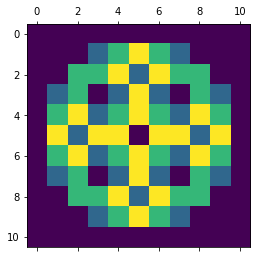

In [4]:
import matplotlib.pyplot as plt

matrix = pilaArena(128)
plt.matshow(matrix)
plt.show()

## PARTE 2
Nótese que cuando en una posición hay una gran cantidad $g$ de granos de arena, es poco eficiente quitar 4 granos. Sería más óptimo poder quitar la mayor cantidad posible de granos y distrubuirlos en los vecinos en una sola operación.

En ese sentido, para realizar lo mencionado anteriormente, se necesita encontrar un $k \in \mathbb{N}$ tal que $ 4k \leq g < 4(k+1)$. De esta forma, al lugar del espacio con $g$ granos se le podría quitar $4k$ granos y a cada vecino en los sentidos cardinales (norte, sur, este y oeste) agregar $k$ granos de arena. Así, en vez de realizar $k$ operaciones de quitar 4  granos de arena, solo se debe realizar 1 operación de quitar $4k$ granos de arena.

Con esta nueva regla, se puede implementar un nuevo algoritmo "optimizado". La siguiente función $pilaArenaOptimizada(g)$ realiza esta nueva simulación "optimizada".

In [5]:
def pilaArenaOptimizada(g):
    n = 2*int(np.sqrt(g/4)) + 1
    matrix = np.zeros((n,n))
    matrix[n//2][n//2] = g
    
    while matrix.max() >= 4:
        for i in range(n):
            for j in range(n):
                if matrix[i][j] >= 4:
                    
                    num = matrix[i][j]
                    k = num//4

                    matrix[i][j] -= k*4

                    matrix[i][j-1] += k
                    matrix[i+1][j] += k
                    matrix[i][j+1] += k
                    matrix[i-1][j] += k
    return matrix


La nueva función es muy similar a la primera función implementada, a diferencia que ahora se aplica la nueva regla. Así, específicamente, el algoritmo realiza lo siguiente:

1- Se crean las condiciones iniciales del problema, es decir: se define  el valor de n, la matriz y se colocan los $g$ granos de arena en su posición inicial
```python
n = 2*int(np.sqrt(g/np.pi)) + 1
matrix = np.zeros((n,n))
matrix[n//2][n//2] = g
```
2- Se establece la condición ciclo while: si se cumple que $ max \{m_{ij}: \forall i,j \in \mathbb{N},   0 \leq i,j \leq n-1  \} \geq 4$, significa que existe un posición con 4 o más granos de arena, entonces se tienen que distribuir los granos y, por ende, se entra al ciclo while.
```python
matrix.max() >=4 
```
3 - Al entrar a el ciclo while, se recorre cada posición de la matriz. Si se cumple que $\exists i,j \in \mathbb{N}$, $ 0 \leq i,j \leq n-1$, tal que $m_{ij} \geq 4$, entonces se aplica la nueva regla: se establece el $k \in \mathbb{N}$ tal que $4k \leq m_{ij} < 4(k+1)$. Luego, a la posición se le quitan $4k$ granos de arenas y a cada vecino se le agregan $k$ granos de arena. Al pasar por todas las posiciones, se revisa el valor máximo de la matriz. Si se cumple que  $ max \{m_{ij}: \forall i,j \in \mathbb{N},   0 \leq i,j \leq n-1  \} \geq 4$, significa que existe un lugar en el espacio con 4 o más granos de arena y, por ende, se vuelve a entrar al ciclo while y se repite lo realizado anteriormente.

```python
while matrix.max() >=4 :
    for i in range(n):
        for j in range(n):
            if matrix[i][j] >= 4:
                
                num = matrix[i][j]
                k = num//4 
                
                matrix[i][j] -= 4*k
                
                matrix[i][j-1] += k
                matrix[i+1][j] += k
                matrix[i][j+1] += k
                matrix[i-1][j] += k
```

4 - Cuando se tiene que $ max \{m_{ij}: \forall i,j \in \mathbb{N},   0 \leq i,j \leq n-1  \} \leq 3$, significa que ningún lugar del espacio tiene 4 o más granos, por tanto, la pila se encuentra en equilibrio y se debe retornar la matriz que representa el espacio con la pila de arena en su estado final de equilibrio.
```python
return matrix
```

En el siguiente ejemplo con $g=128$ se muestra el resultado del algoritmo anterior. Para visualizar la información, a cada valor de la matriz se le asigna un color y se "plotea" la información.

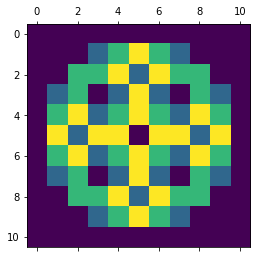

In [6]:
matrix = pilaArenaOptimizada(128)
plt.matshow(matrix)
plt.show()

## PARTE 3
A priori, como el algoritmo "optimizado" debe realizar solamente 1 operación en vez de $k$ operaciones para distrubuir los granos en un lugar del espacio, se afirma que está optimizado. Sin embargo, gustaría saber "experimentalmente" cuan optimizado está realmente.

Para eso, el siguiente programa toma una lista de valores de $g$ y mide el tiempo de ejecución de las dos funciones $pilaArena(g)$ y $pilaArenaOptimizada(g)$ para cada valor de la lista y grafica la información.

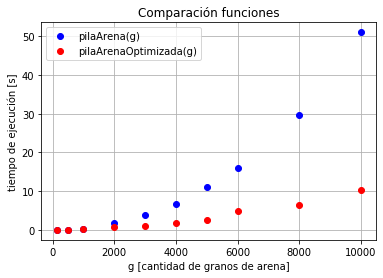

In [7]:
import time 
lista = [128, 500, 1000, 2000, 3000, 4000, 5000, 6000, 8000, 10000]
tiempos1 = []
tiempos2 = []

for e in lista:
    inicio = time.time()
    matrix = pilaArena(e)
    fin = time.time()
    t = fin - inicio
    tiempos1.append(t)

for e in lista:
    inicio = time.time()
    matrix = pilaArenaOptimizada(e)
    fin = time.time()
    t = fin - inicio
    tiempos2.append(t)

plt.plot(lista,tiempos1, 'bo', label = "pilaArena(g)")
plt.plot(lista,tiempos2, 'ro', label = "pilaArenaOptimizada(g)")
plt.title("Comparación funciones")
plt.xlabel("g [cantidad de granos de arena]")
plt.ylabel("tiempo de ejecución [s]")
plt.legend()
plt.grid(True)

plt.show()

Más específicamente, el programa anterior realizar lo siguiente:

1- Se importa la librería para medir el tiempo, se define la lista de valores de $g$ y se definen dos listas que van a guardar los tiempos de ejecución de los distintos valores de $g$ para las funciones $pilaArena(g)$ y $pilaArenaOptimizada(g)$, respectivamente.
```python
import time 
lista = [128, 500, 1000, 2000, 3500, 5000, 7500, 10000]
tiempos1 = []
tiempos2 = []
```
2- Para cada valor de la lista de valores de $g$, se ejecuta la función $pilaArena(g)$, se calcula su tiempo de ejecución y se guarda el valor.

```python
for e in lista:
    inicio = time.time()
    matrix = pilaArena(e)
    fin = time.time()
    t = fin - inicio
    tiempos1.append(t)
```
2- Del mismo modo, para cada valor de la lista de valores de $g$, se ejecuta la función $pilaArenaOptimizada(g)$, se calcula su tiempo de ejecución y se guarda el valor.

```python
for e in lista:
    inicio = time.time()
    matrix = pilaArenaOptimizada(e)
    fin = time.time()
    t = fin - inicio
    tiempos2.append(t)
```

4- Con la información obtenida, se grafican dos funciones: los valores de $g$ v/s el tiempo de ejecución para la función $pilaArena(g)$ y los valores de $g$ v/s el tiempo de ejecución para la función $pilaArenaOptimizada(g)$. A cada función se le asigna un color y se establecen propiedades del gráficos como título, nombres de los ejes, etcétera.

```python
plt.plot(lista,tiempos1, 'bo', label = "pilaArena(g)")
plt.plot(lista,tiempos2, 'ro', label = "pilaArenaOptimizada(g)")
plt.title("Comparación funciones")
plt.xlabel("g [unidades de granos]")
plt.ylabel("tiempo de ejecución [s]")
plt.legend()
plt.grid(True)

plt.show()
```


## PARTE 4
#### DISCUSIONES Y CONCLUSIONES


1- Nótese que, mientras mayor es la cantidad $g$ de granos de arena, mayor es la diferencia de tiempo  de ejecución entre las dos funciones. Para el caso $g = 128$, la diferencia de tiempo de ejecución de las funciones es despreciable. Pero, para el caso $g = 10000$, la función optimizada es, aproximadamente, 5 veces más rápida. Así, cuando se tienen $g$ muy grandes, la diferencia entre los algoritmos es significativa y, en ese sentido, se puede afirmar que, realmente, el segundo algoritmo es más óptimo.

2- Respecto a la geometría de las pilas de arena, éstas tienden a una forma circular cuando $g$ crece y son simétricas respecto a un eje vertical y otro eje horizontal. En el siguiente programa se muestra las formas de las pilas para $g$ = 1000, 5000 y 10000. 

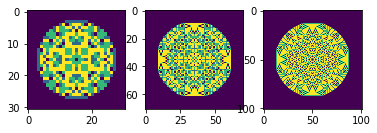

In [8]:
lista = [1000, 5000, 10000]
fig, axs = plt.subplots(1,len(lista))
for i in range(len(lista)):
    matrix = pilaArenaOptimizada(lista[i])
    axs[i].imshow(matrix)

plt.show()

3- En ese sentido, pensando en las propiedades geométricas y en las propiedades simétricas de la pila de arena, se podrían estudiar nuevas optimizaciones para hacer más eficientes los algoritmos. Por ejemplo, nótese que para los 3 casos anteriores, el cuadrado que encierra el "círculo" siempre es más grande. Gustaría tener un $n$ que siempre fuese del tamaño del diámetro del "círculo" que se genera al distribuir los $g$ granos de arena. Esto ayudaría a que los algoritmos que se implementaron anteriormente sean más veloces, ya que se recorrería un espacio más pequeño. Respecto a lo planteado, en el siguiente programa se muestran las pilas de arena para  $g$ "especiales".

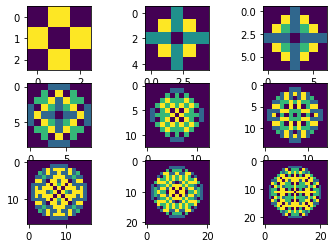

In [25]:
lista = [4, 16, 44, 88, 144, 208, 320, 408, 512]
fig, axs = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        matrix = pilaArenaOptimizada(lista[3*i + j])
        axs[i][j].imshow(matrix)


plt.show()

Nótese que para $g=4$ se genera un "círculo" de diámetro($n$) igual 3, para $g=16$ se genera un "círculo" de $n$ igual a 5, para $g=44$ se genera un "círculo" de $n$ 7, y así se tiene que:

$$ g \rightarrow  n $$

$$  4 \rightarrow 3 $$
$$ 16 \rightarrow 5 $$
$$ 44 \rightarrow 7 $$
$$ 88 \rightarrow 9 $$
$$ 144 \rightarrow 11 $$
$$ 208 \rightarrow 13 $$
$$ 320 \rightarrow 15 $$
$$ 408 \rightarrow 17 $$
$$ 512 \rightarrow 19 $$

En particular, el diámetro de los "círculos" vienen dado por: 
$$ n = 2r + 1$$

Donde r es un radio. Así, se tiene que:

$$ g \rightarrow r$$

$$  4 \rightarrow 1 $$
$$ 16 \rightarrow 2$$
$$ 44 \rightarrow 3 $$
$$ 88 \rightarrow 4 $$
$$ 144 \rightarrow 5 $$
$$ 208 \rightarrow 6 $$
$$ 320 \rightarrow 7 $$
$$ 408 \rightarrow 8 $$
$$ 512 \rightarrow 9 $$

Respecto a lo anterior, es interesante preguntarse cuáles son los $g$ tales que $pilaArena(g)$ genera un círculo de radio $r$ y $pilaArena(g-1)$ genera un círculo de radio $r-1$. En ese sentido, justamente los $g$ presentados anteriormente son los que cumplen la propiedad mencionado. Es decir, por ejemplo, $pilaArena(16)$ genera un círculo de radio 2 (diámetro 5) y $pilaArena(15)$ genera un círculo de radio 1 (diámetro 3). Es más, $\forall g \in \mathbb{N}, 4 \leq g < 16$, se tiene que $g$ genera un círculo de radio 1. De esa forma, si se define una sucesión $(a_{n})_{n \in \mathbb{N}}$ tal que:

$$ a_{0} = 0 $$ 
$$ a_{1} = 4 $$ 
$$ a_{2} = 16 $$ 
$$ a_{3} = 44 $$ 
$$ a_{4} = 88 $$ 
$$ a_{5} = 144 $$ 
$$ a_{6} = 208 $$ 
$$ a_{7} = 320 $$ 
$$ a_{8} = 408 $$
$$ a_{9} = 512 $$
$$ . $$
$$ . $$
$$ . $$

y si se conocen los términos de la sucesión hasta cierto $k \in \mathbb{N}$, entonces $\forall g \in \mathbb{N}$, $g \leq a_{k}$ se puede determinar a través de búsqueda binaria el $n$ tal que $n$ sea igual al diámetro del círculo.

Por ejemplo: se quiere saber el $n$ para $g = 475$. Realizando búsqueda binaria entre $a_{0}$ y $a_{9}$ podemos notar que: $a_{8} < 475 < a_{9}$, luego, el $n$ buscado para $g = 475$ es el asociado con $a_{8}$. Más específicamente, se tiene que : $n = 2 \cdot 8 + 1 = 17$

Esta optimización es ideal si:

i- Se conocen los términos de la sucesión o se conoce una forma óptima de calcular lo términos.

Respecto a la sucesión,  en www.oeis.org/A259013 se puede encontrar la sucesión hasta su término $a_{45} = 14388$

4- También, notando que la pila tiene la propiedad de ser abeliana, es decir conmutativa, se puede proponer la siguiente optimización.

Cuando se calcula $ max \{m_{ij}: \forall i,j \in \mathbb{N},   0 \leq i,j \leq n-1  \}$, se podrían guardar los índices $i_{m},j_{m}$ que representan los índices del valor máximo de la matriz  y aplicar directamente la regla de distribución de granos de arena en $m_{i_{m} j_{m}}$. Así, en vez de recorrer todas las posiciones, se aplica la regla solamente en la posición máxima y se vuelve a verificar el nuevo máximo y nuevamente se aplica la regla en el nuevo máximo y así hasta que se cumpla  que $ max \{m_{ij}: \forall i,j \in \mathbb{N},   0 \leq i,j \leq n-1  \} \leq 3$. Como la pila es abeliana, el resultado final es independiente del orden en que se aplica la regla para las distintas posiciones, por lo que la optimización es correcta.

Así, en código la optimización quedaría de la siguiente forma:

```python
while matrix.max() >=4:
    #suponiendo que se guardaron los índices del máximo (im,jm)
    num = matrix[im][jm]
    k = num//4 
    
    matrix[im][jm] -= 4*k
    
    matrix[im][jm-1] += k
    matrix[im+1][jm] += k
    matrix[im][jm+1] += k
    matrix[im-1][jm] += k
```

5- Finalmente, lo más relevante de destacar de todos los procedimientos realizados en el presente informe es el poder que puede tener una optimización en el tiempo de ejecución para un algoritmo, las posibilidades abiertas de encontrar nuevas optimizaciones y la necesidad de implementar optimizaciones para que los algoritmos sean más eficientes, sobre todo en situaciones donde se está trabajando con grandes cantidades de información.




